In [1]:
# prompt: import the two data .json files and shuffle them together into one large array, adding another parameter 1 or 0 whether it is from the phishing file or the legitimate file

# https://github.com/ebubekirbbr/pdd/blob/master/input/data_phishing_37175.json

import json
import numpy as np
import os

# Load the phishing data from the JSON file
with open('data_legitimate_36400.json') as f:
    ldata = json.load(f)

# Load the legitimate data from the JSON file
with open('data_phishing_37175.json') as f:
    pdata = json.load(f)

# Create an empty array to store the combined data
combined_data = []

# Add the phishing data to the combined data array, and add a label of 1 to indicate that it is phishing
for item in pdata:
    combined_data.append([item, 1])

# Add the legitimate data to the combined data array, and add a label of 0 to indicate that it is legitimate
for item in ldata:
    combined_data.append([item, 0])

# Shuffle the combined data array
np.random.shuffle(combined_data)

# Convert the combined data array to a numpy array
combined_data = np.array(combined_data)

print(combined_data[:10])



[['http://www.ryssel-ferienwohnung.de/tmp/cgi-ero/mail-box/index.php?login=info@aerolinks.us'
  '1']
 ['http://asiandream.ru/images/m_images/index/cameo.php?login&amp;continue=to&amp;inbox=xclusiv-3d|'
  '1']
 ['http://intergoods.rs/language/Rname.htm' '1']
 ['http://www.paceinfonet.org/wp-admin/network/dboxlog/knd/Dropbox.html'
  '1']
 ['http://uaanow.com/admin/online/order.php?rand%5Cu003d13InboxLightaspxn.1774256418%5Cu0026amp'
  '1']
 ['http://www.musiclawcontracts.com/product/session-musician-contract/'
  '0']
 ['http://flights.idealo.com/airline/LATAM-Chile-LA/' '0']
 ['http://renovationkingdom.com/downloader/cc/dpbx/' '1']
 ['http://watsonspestcontrol.com.au/loss/drpbxx/drpbxx/index.php' '1']
 ['http://www.miccostruzioni.it/wps/ef205/6a7ab/7r2a8/help/nn/Ameli/Ameli/PortailAS/appmanager/PortailAS/assure_somtc=true/po/index_2.html'
  '1']]


In [3]:
# prompt: print the lengths of the links at each percentile, from shorter to longer

import numpy as np

# Extract the links from the combined data
links = [item[0] for item in combined_data]

# Calculate the percentiles
percentiles = np.percentile(np.char.str_len(links), np.arange(0, 101))



In [4]:
# prompt: make urls and labels arrays from the combined_data without using libraries

urls = []
labels = []

for item in combined_data:
  urls.append(item[0])
  labels.append(item[1])


In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np


# Tokenize the URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)

# Pad the sequences
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numpy array
labels = np.array(labels, dtype=int)

# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=200, output_dim=128, mask_zero=True),
    tf.keras.layers.Conv1D(128, 5, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling1D(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='elu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)
print(history.history)

Epoch 1/10
1840/1840 [==============================] - 84s 41ms/step - loss: 0.2405 - accuracy: 0.9371 - val_loss: 0.1257 - val_accuracy: 0.9587
Epoch 2/10
1840/1840 [==============================] - 72s 39ms/step - loss: 0.1033 - accuracy: 0.9686 - val_loss: 0.0822 - val_accuracy: 0.9750
Epoch 3/10
1840/1840 [==============================] - 69s 38ms/step - loss: 0.0802 - accuracy: 0.9759 - val_loss: 0.0722 - val_accuracy: 0.9772
Epoch 4/10
1840/1840 [==============================] - 67s 36ms/step - loss: 0.0717 - accuracy: 0.9795 - val_loss: 0.0690 - val_accuracy: 0.9776
Epoch 5/10
1840/1840 [==============================] - 67s 36ms/step - loss: 0.0561 - accuracy: 0.9845 - val_loss: 0.0748 - val_accuracy: 0.9819
Epoch 6/10
1840/1840 [==============================] - 66s 36ms/step - loss: 0.0488 - accuracy: 0.9865 - val_loss: 0.0639 - val_accuracy: 0.9809
Epoch 7/10
1840/1840 [==============================] - 70s 38ms/step - loss: 0.0448 - accuracy: 0.9880 - val_loss: 0.0601 -

In [12]:
# prompt: save the model and load it up

# Save the model
model.save('model_98.53.keras')



In [2]:
import tensorflow as tf

# Load the model
model = tf.keras.models.load_model('model_98.55.keras')


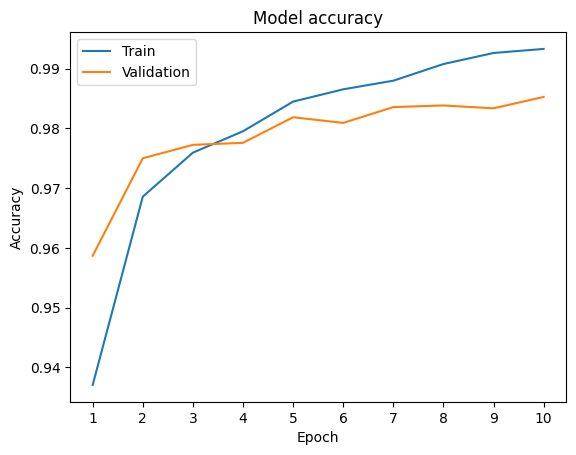

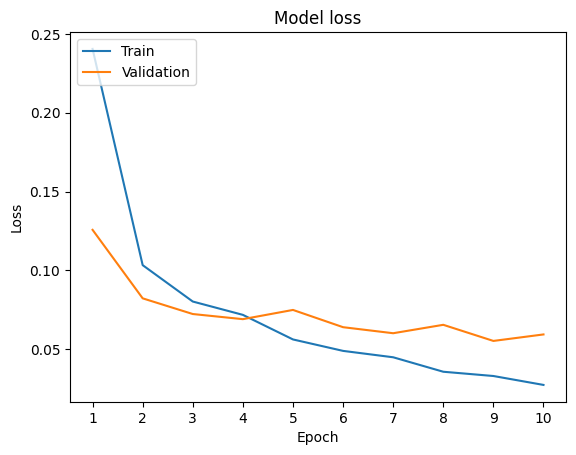

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Plot accuracy
plt.figure()
plt.plot(np.arange(1, len(history.history['accuracy']) + 1), history.history['accuracy'])
plt.plot(np.arange(1, len(history.history['val_accuracy']) + 1), history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history.history['accuracy']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot loss
plt.figure()
plt.plot(np.arange(1, len(history.history['loss']) + 1), history.history['loss'])
plt.plot(np.arange(1, len(history.history['val_loss']) + 1), history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.xticks(np.arange(1, len(history.history['loss']) + 1, 1))
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [14]:

# Make predictions on the test data
predictions = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)


2300/2300 [==============================] - 29s 12ms/step
Accuracy: 0.9947808358817534


In [15]:
# prompt: print the number of false positives, real positive, false negative, real negative % on labels and predictions

# Calculate the number of true positives, false negatives, true negatives, and false positives.
tp = 0
fn = 0
tn = 0
fp = 0

for i in range(len(labels)):
  if labels[i] == 1 and predictions[i] == 1:
    tp += 1
  elif labels[i] == 1 and predictions[i] == 0:
    fn += 1
  elif labels[i] == 0 and predictions[i] == 0:
    tn += 1
  elif labels[i] == 0 and predictions[i] == 1:
    fp += 1

# Calculate the percentages of true positives, false negatives, true negatives, and false positives.
tp_percent = tp / (tp + fn) * 100
fn_percent = fn / (tp + fn) * 100
tn_percent = tn / (tn + fp) * 100
fp_percent = fp / (tn + fp) * 100

# Print the percentages of true positives, false negatives, true negatives, and false positives.
print("True Positives:", tp_percent)
print("False Negatives:", fn_percent)
print("True Negatives:", tn_percent)
print("False Positives:", fp_percent)


True Positives: 99.65299260255549
False Negatives: 0.3470073974445192
True Negatives: 99.29945054945055
False Positives: 0.7005494505494506


In [ ]:
# prompt: using combined_data parse the url into the following features:
# Feature	Explanation
# Raw Word Count	The number of words obtained after parsing the URL by special characters.
# Brand Check for Domain	Is domain of the analyzed URL in the brand name list?
# Average Word Length	The average length of the words in the raw word list.
# Longest Word Length	The length of the longest word in the raw word list.

import numpy as np
import re
import collections

def parse_url(url):
  # Extract the domain name
  domain = url.split(".")[1]

  # Split the URL into words
  words = re.split('[^a-zA-Z]', url)

  # Remove empty strings
  words = [word for word in words if word]

  # Count the number of words
  raw_word_count = len(words)

  # Check if the domain is in the brand name list
  brand_check_for_domain = 1 if domain in ["google.com", "facebook.com", "amazon.com"] else 0

  # Calculate the average word length
  total_word_length = sum(len(word) for word in words)
  average_word_length = total_word_length / raw_word_count

  # Calculate the longest word length
  longest_word_length = max(len(word) for word in words)

  return [raw_word_count, brand_check_for_domain, average_word_length, longest_word_length]

# Parse the URLs in the combined_data array
parsed_data = []
for item in combined_data:
  parsed_data.append([item[0], *parse_url(item[0]), item[1]])

# Convert the parsed data to a numpy array
parsed_data = np.array(parsed_data)

# Print the first 10 rows of the parsed data
print(parsed_data[:10])


[['https://en.wikipedia.org/wiki/Network_address_translation' '8' '0'
  '6.0' '11' '0']
 ['https://theconversation.com/kyoto-protocol-fails-get-ready-for-a-hotter-world-10742'
  '12' '0' '5.333333333333333' '15' '0']
 ['http://bhejacry.com/wp-includes/js/jcrop/gucci2014/gdocs/processing.html'
  '11' '0' '5.090909090909091' '10' '1']
 ['http://www.amexpilas.org/icono/_notes/ali/stdc.html' '9' '0'
  '4.444444444444445' '9' '1']
 ['http://www.la-reprise-economique.fr/wp-includes/match2/' '9' '0'
  '4.777777777777778' '10' '1']
 ['http://download.cnet.com/s/security-antivirus/windows/' '8' '0' '5.5'
  '9' '0']
 ['http://www.thefullwiki.org/Longitude_of_the_ascending_node' '9' '0'
  '5.333333333333333' '11' '0']
 ['https://www.quora.com/Whats-the-best-way-to-learn-device-driver-development-on-Linux'
  '15' '0' '4.533333333333333' '11' '0']
 ['http://dmega.co.kr/dmega/data/qna/sec/page.php?email=&log=1&domain='
  '13' '0' '3.769230769230769' '6' '1']
 ['http://vajuboqabasuh432.cf/2235767/355

In [10]:
# prompt: open a xlsx file and convert it into a an array

import pandas as pd

# Open the xlsx file
df = pd.read_excel('data.xlsx')

# Convert the xlsx file to a numpy array
data = df.to_numpy()

# Print the first 10 rows of the numpy array

edited_data = []
for item in data:
  edited_data.append([item[1], item[0]])

print(edited_data[:10])


[['http://dbs.vote-friend.com/sg?ref=anything', 1], ['https://www.reynoldstransfer.com/versa-lift-fork-truck/', 0], ['https://www.halisupportservice.com/Login.php', 1], ['https://www.signets.com.br/wp-includes/wlwmanifest.xml', 0], ['https://docs.google.com/document/d/e/2PACX-1vTS9czxqyCsGi-QUifs7m1MqJZMLCjLcCNhW3DsaHdss5ymnPy6y0VSGwvF3pIu6js22Ydjyew1OyO_/pub?embedded=true', 1], ['https://www.iwestco.com/virtual-consult/', 0], ['https://is.gd/N19JOz', 1], ['https://httpsservices.runescape.com-ov.ru/', 1], ['https://viandjo.com/website/membership/service/billing.php?SessionID-xb=NL.=.3754672._.4d1d7fa8d72fb5318fdf3baed95a10e7.=.Netherlands', 1], ['https://www.millect.com/Plans/tabid/76/Default.aspx', 0]]


In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

urls = []
labels = []

for item in edited_data:
  urls.append(item[0])
  labels.append(item[1])


# Tokenize the URLs
tokenizer = Tokenizer(char_level=True)
tokenizer.fit_on_texts(urls)
sequences = tokenizer.texts_to_sequences(urls)

# Pad the sequences
max_length = 200
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Convert labels to numpy array
labels = np.array(labels, dtype=int)


# Make predictions on the test data
predictions = model.predict(padded_sequences)

# Convert the predictions to binary values
for i in range(len(predictions)):
    if predictions[i] > 0.5:
        predictions[i] = 1
    else:
        predictions[i] = 0

# Evaluate the model on the test data
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(labels, predictions)
print("Accuracy:", accuracy)


625/625 [==============================] - 10s 11ms/step
Accuracy: 0.5833


In [13]:
# prompt: print the number of false positives, real positive, false negative, real negative % on labels and predictions

# Calculate the number of true positives, false negatives, true negatives, and false positives.
tp = 0
fn = 0
tn = 0
fp = 0

for i in range(len(labels)):
  if labels[i] == 1 and predictions[i] == 1:
    tp += 1
  elif labels[i] == 1 and predictions[i] == 0:
    fn += 1
  elif labels[i] == 0 and predictions[i] == 0:
    tn += 1
  elif labels[i] == 0 and predictions[i] == 1:
    fp += 1

# Calculate the percentages of true positives, false negatives, true negatives, and false positives.
tp_percent = tp / (tp + fn) * 100
fn_percent = fn / (tp + fn) * 100
tn_percent = tn / (tn + fp) * 100
fp_percent = fp / (tn + fp) * 100

# Print the percentages of true positives, false negatives, true negatives, and false positives.
print("True Positives:", tp_percent)
print("False Negatives:", fn_percent)
print("True Negatives:", tn_percent)
print("False Positives:", fp_percent)


True Positives: 62.35000000000001
False Negatives: 37.65
True Negatives: 54.31
False Positives: 45.69
